# Kepler et Runge-Kutta 4
 
Dans un premier temps nous allons résoudre numériquement le problème de Kepler à deux corps. Nous nous attendons à voir une trajectoire elliptique de l'un des corps autour de l'autre ( ici ce sera une trajectoire elliptique de la Lune autour de la Terre). Ensuite nous allons calculer les valeurs des demis-grands axes de l'ellipse et donc trouver son excentricité. Une comparaison théorique sera ensuite faite.

Commençons d'abord par importrer les librairies et fonctions dont nous avons besoin, ici Numpy et Matplotlib. De cette librairie nous importons les fonction $cos$ et $log$ qui vont nous servir dans les exercices suivants. De Matplotlib nous importons pyplot qui va nous permettre de générer des graphiques.
Nous prenons la même police de caligraphique que dans le mooc.
 

In [1]:
import numpy
from numpy import cos, log
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### Question 1:
#### Résoudre les équations du mouvement sous l'effet des forces de pesanteur décrites ci-dessus et montrer que la trajectoire est bien une ellispe avec la bonne excentricité.

Nous avons l'équation 
$$\textbf{F}_{1,2}= - \frac{Gm_{1}m_{2}\textbf{r}}{r_{1,2}^3}$$

En appliquant ceci à notre problème à deux corps,en nous réstreignant au référentiel où la terre est au repos, et en appliquant la deuxième loi de Newton, on obtient:


$$\frac{d^{2}\textbf{r}_{TL}}{dt^{2}} = -\frac{Gm_{T}\textbf{r}_{TL}}{r_{TL}}$$


où $r_{TL}$ est la distance Terre-Lune. On peut alors diviser cette équation vectorielle en deux équations pour $x$ :la position de la Lune selon $x$ et $y$ : la position de la Lune selon $y$ dans le référentiel ou la Terre se trouve en $(0,0)$

$$\frac{d^{2}x}{dt^{2}} = -\frac{Gm_{T}x}{(x^2+y^2)^{3/2}}$$
$$\frac{d^{2}y}{dt^{2}} = -\frac{Gm_{T}y}{(x^2+y^2)^{3/2}}$$

Nous allons diviser ces deux équations du déuxième degré en quatres équations du premier degré de la forme suivante:

$$\frac{dv_{x}}{dt} = -\frac{Gm_{T}x}{(x^2+y^2)^{3/2}}$$
$$\frac{dv_{y}}{dt} = -\frac{Gm_{T}y}{(x^2+y^2)^{3/2}}$$
$$\frac{dx}{dt} = v_{x} $$
$$\frac{dy}{dt} = v_{y}$$

De la même manière que nous l'avons vu en cours, nous avons maintenant une équation du type u'=f(u) où:

\begin{equation}
u =
\begin{bmatrix}
    v_{x}       \\
    v_{y}        \\
    x       \\
    y         \\
\end{bmatrix}
\end{equation}
et
\begin{equation}
f(u) =
\begin{bmatrix}
    -\frac{Gm_{T}x}{(x^2+y^2)^{3/2}}       \\
    -\frac{Gm_{T}y}{(x^2+y^2)^{3/2}}        \\
    v_{x}       \\
    v_{y}         \\
\end{bmatrix}
\end{equation}

On peut donc commencer à résoudre numériquement ce système. Commençons par définir nos conditions initiales.

In [2]:
x0=-362600000.0 #position p/r à x en mètres(m) de la Lune à sa périgée
y0=0.0          #position p/r à y en mètres(m) de la Lune à sa périgée
v0_x=0.0        #vitesse initiale p/r à x de la Lune en mètres/secondes(m/s) à sa périgée.
v0_y=1083.434974     #vitesse initiale p/r à y de la Lune en mètres/secondes(m/s) à sa périgée.

T=28*86400      #Temps total où l'on va effectuer l'itération.
dt=1.0          #pas de temps
N = int(T/dt)+1  #nombre d'itérations

m_lune = 7.348*10**(22)   #masse de la lune en kg
Grav_cst=6.67408*10**(-11)#constante gravitationnelle en m^3 kg
m_terre=5.972*10**(24)    #masse de la Terre en kg
epsilon = 0.0549006       #excentricité exacte

Nous allons donc maitenant définir une fonction $f$ qui prend comme argument une liste $u$ contenant la solution à un certain temps n, de taille 4. Cette fonction va nous redonner la partie droite de l'équation $u'=f(u)$, c'est à dire une liste de 4 élements.


In [3]:
def f(u):
    vx = u[0]
    vy = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([(-x*Grav_cst*m_terre/(x**2+y**2)**(3/2)),(-y*Grav_cst*m_terre/(x**2+y**2)**(3/2)),vx,vy])

Nous allons maintenant définir notre fonction qui va implémenter l'algorithme de Runge-Kutta d'ordre 4. Nous voyons que pour nos équations du premier ordre $u' =f(u)$, il n'y a pas de dépendance explicte en temps. Ainsi la méthode RK4 devra être appliquée seulement sur les variables de position et vitesse. Nous pouvons dans ce cas calculer les coefficients $k_{i}$ qui seront ici des listes contenant 4 éléments; chaque élément de cette liste correspondant au coefficient $k_{i}$ pour la variable de position/vitesse $n$:

(Source:https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge.E2.80.93Kutta_method) 

Formellement on a : 
$$ k_{1} = f(u)$$
$$ k_{2} = f(u + \frac{dt k_{1}}{2})$$
$$ k_{3} = f(u + \frac{dt k_{2}}{2})$$
$$ k_{4} = f(u + dt k_{3})$$
Ainsi $k_{1}$ sera de la forme :

$$ k_{1} = [k_{1,vx}, k_{1,vy}, k_{1,x}, k_{1,y}]$$

et l'itération sur les positions/vitesses sera :
$$ u_{n+1} = u_{n} +\frac{dt}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}) $$ 
et nous n'avons aucune itération sur le temps nécéssaire.

Ainsi nous allons définir notre fonction RK4 qui prend comme argument la fonction $f$, le pas de temps $dt$ et une liste u contenant les positions/vitesses à un instant donné, et fait le calcul des coefficients $k_{i}$.Cette fonction renvoie une nouvelle liste qui contiendra les positions/vitesses de la liste u après un temps dt.

In [4]:
def rk4_step(u,f,dt):
   
    k1 = f(u)
    k2 = f(u + (dt*0.5)*k1)
    k3 = f(u + (dt*0.5)*k2)
    k4 = f(u + dt*k3)
    
    
    return u + (dt/6)*(k1+2*k2+2*k3+k4)
    

En définissant nos conditions initiales , nous pouvons maintenant calculer les positions/vitesses de la Lune, dans le référentiel ou la Terre reste en$(0,0)$ pour un temps total T qui correspond à une révolution de la Lune autour de la Terre. Pour cela, nous créons une matrice remplie de 0 de taille $(N,4)$, et nous définissons que la première ligne de cette matrice contient les conditions initiales de la position/vitesse de la Lune.

Ensuite nous faisons notre itération en utilisant la fonction rk4_step sur chaque ligne de cettre matrice, en commençant par la première ligne, en utilisant une boucle 'for' pour N-1 itérations(puisque nous avions mis +1 dans notre N).

In [5]:
u_rk4_1 = numpy.zeros((N,4))
u_rk4_1[0] = numpy.array([v0_x,v0_y,x0,y0])   #liste contenant les conditions initiales

for n in range(N-1):
    u_rk4_1[n+1]= rk4_step(u_rk4_1[n],f,dt) # itération pour remplir la liste u par la méthode RK4
    

Nous faisons ici un print(u_rk4_1) pour voir le changement des valeurs, ainsi que pour vérifier que les conditons initiales de la matrice sont les bonnes.

In [6]:
print(u_rk4_1)

[[  0.00000000e+00   1.08343497e+03  -3.62600000e+08   0.00000000e+00]
 [  3.03148628e-03   1.08343497e+03  -3.62600000e+08   1.08343497e+03]
 [  6.06297257e-03   1.08343497e+03  -3.62600000e+08   2.16686995e+03]
 ..., 
 [  1.37233063e+01   1.08334216e+03  -3.62568936e+08   4.90465570e+06]
 [  1.37263375e+01   1.08334212e+03  -3.62568922e+08   4.90573904e+06]
 [  1.37293687e+01   1.08334208e+03  -3.62568909e+08   4.90682238e+06]]


Créons maintenant un graphique de la trajectoire obtenue, pour cela nous créons des listes contenant la valeurs des positions $x$ et $y$ en copiant les éléments de u_rk4_1 en positon 2 et 3 correspondant aux positions $x$ et $y$ de la Lune dans une nouvelle liste.

In [7]:
x_rk4=u_rk4_1[:,2] #liste de la position x
y_rk4=u_rk4_1[:,3] #liste de la position y 

Construisons alors notre graphique! 

(-401500554.46439159,
 454311643.75222331,
 -426919141.9703843,
 426919141.97041541)

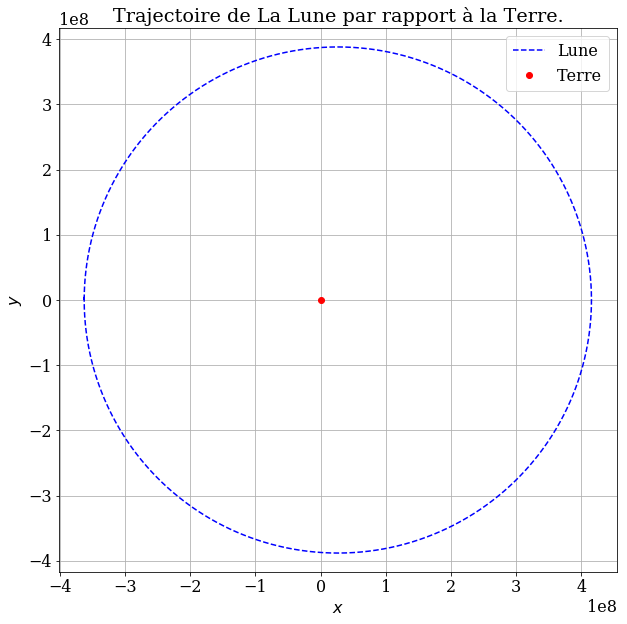

In [8]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_rk4,y_rk4,'b--',label='Lune')
pyplot.plot(0,0,'ro',label="Terre")
pyplot.title('Trajectoire de La Lune par rapport à la Terre.')
pyplot.legend();
pyplot.axis('equal')

Nous obtenons bel et bien une ellipse. En effet sur le graphique, la Terre est en postion $(0,0)$ et l'ellipse n'est pas centrée sur ce point là. Pour calculer l'excentricité nous devons d'abord calculer les demis-axes.

Nous créons une copie de la liste u_rk4_1 pour la question 5.

In [9]:
new_list = u_rk4_1[::]

### Question 2:
#### Que vaut le demi grand axe a et le demi grand axe b selon vos calculs? 


Pour calculer les demis grands axes a et b, il suffit de prendre la moitié de la distance entre les valeurs maximales et minimales de $x$ et $y$ par lesquelles la Lune passe. Il nous suffit alors de calculer $$a=\frac{\mid x_{min}-x_{max}\mid}{2}$$ $$b=\frac{\mid y_{min}-y_{max}\mid}{2}$$ Nous avons utilisé les fonctions "numpy.amin" et "numpy.amax" qui prennent comme argument une liste u et qui renvoient le minimum et le maximum de cette liste, respectivement, pour récupérer les positions minimales et maximales. En appliquant ces fonctions aux listes x_rk4 et y_rk4, nous trouvons les valeurs maximales/minimales des positions x et y recherchées.
Nous avons ensuite utilisé une boucle "for" pour récupérer les indices de ces positions dans les tableaux pour après utiliser les deux formules ci-dessus en veillant à utiliser les bons indices.

Calcul du minimun et du maximum de $x$ et $y$ :

In [10]:
xmin = numpy.amin(x_rk4)
xmax = numpy.amax(x_rk4)
ymin = numpy.amin(y_rk4)
ymax = numpy.amax(y_rk4)
print(xmin)
print(xmax)
print(ymin)
print(ymax)


-362600000.0
415411089.288
-388108310.882
388108310.882


Nous effectuons un print de ces valeurs, pour vérifier que la position initiale de la Lune est bien une position minimale.

Repérage des indices pour lesquelles les positions $x$ et $y$ sont minimales/maximales:

In [11]:
for n in range(N):
    if (u_rk4_1[n][2] == xmin):
        print('Indice pour lequel la valeur de x est minimale',n)
    elif (u_rk4_1[n][2] == xmax):
        print('Indice pour lequel la valeur de x est maximale',n)
    elif (u_rk4_1[n][3] == ymin):
        print('Indice pour lequel la valeur de y est minimale',n)
    elif (u_rk4_1[n][3] == ymax):
        print('Indice pour lequel la valeur de y est maximale',n)
        

    

Indice pour lequel la valeur de x est minimale 0
Indice pour lequel la valeur de y est maximale 577581
Indice pour lequel la valeur de x est maximale 1207335
Indice pour lequel la valeur de y est minimale 1837090


Maitenant que nous avons les indices où les positions x et y sont minimales, nous pouvons faire le calcul des demis grands axes

Calcul des deux demis grands axes:

In [12]:
a = numpy.abs(u_rk4_1[0][2] - u_rk4_1[1207207][2])/2
b = numpy.abs(u_rk4_1[577544][3] - u_rk4_1[1836859][3])/2
print('La longeur du demi grand axe a est de {} m'.format(a))
print('La longeur du demi grand axe b est de {} m'.format(b ))

La longeur du demi grand axe a est de 389005535.11532813 m
La longeur du demi grand axe b est de 388108274.98642117 m


#### Calcul de d'excentricité

Pour calculer l'excentricité de la trajectoire, on utilise la relation : $$\epsilon = \sqrt{1-\frac{b^{2}}{a^{2}}}$$ qui est propre à une ellipse fermée.

(Source:https://fr.wikipedia.org/wiki/Excentricité_orbitale)

Nous obtenons comme résultat:

In [13]:
epsilon = numpy.sqrt(1-(b**2)/(a**2))
print('l excentricité de la trajectoire de la Lune autour de la Terre est:', epsilon)

l excentricité de la trajectoire de la Lune autour de la Terre est: 0.0678806070273


Nous obtenons une valeur proche de celle prédite , à 0.01 décimale près. Cette erreur est dûe à notre nombre d'itérations. Elle est intimement liée à la discrétisation du temps.
On remarque aussi que l'excentricté est proche de $0$, ce qui explique que la trajectoire soit presque circulaire.

### Question 3: 
#### Que vaut la période de l'orbite?


Pour calculer la période de révolution de la Lune autour de la Terre, nous avons utilisé la relation: $$P=2\pi\sqrt{\frac{a^{3}}{G(M_{Terre}+M_{Lune})}}$$

(Source: https://fr.wikipedia.org/wiki/Période_de_révolution)

In [14]:
p = 2*numpy.pi*numpy.sqrt(((a)**3)/((Grav_cst)*(m_terre+m_lune)))
print('La periode de révolution de la Lune autour de la Terre est de {} secondes'.format(p))

La periode de révolution de la Lune autour de la Terre est de 2399951.3675122033 secondes


In [15]:
print('La période de révolution de la Lune autoure de la terre est de {} jours'.format(p/86400))

La période de révolution de la Lune autoure de la terre est de 27.777214901761614 jours


Ceci est proche de la valeur exacte de la périodicitié de la trajectoire de la Lune autour de la Terre, qui est de : 27.32166 jours.

(Source: https://eclipse.gsfc.nasa.gov/SEhelp/moonorbit.html)

### Question 4:
#### Quel est l'ordre de la méthode numérique utilisée (faites une représentation graphique comme celle discutée dans les modules du cours)?


Pour calculer l'ordre de convergence, nous devons d'abord chercher à comparer les solutions  obtenues avec les différents intervalles $\Delta t$. Pour cela, nous avons choisi 3 pas de temps différents: $100000, 10000, 1000$ que nous plaçons dans un tableau et nous avons utilisé la relation $$E=\Delta t \sum \limits_{n=0}^N \mid{z(t_{n})-z_{n}}\mid$$
que nous avons vu dans le Module 1. Pour chaque $\Delta t$, nous obtenons une matrice u_rk4. 


La fonction "get_diffgrid" va prendre deux matrices "u_current" et "u_fine" ainsi qu'un intervalle dt et renvoyer $E$.
Comme le nombre d'itérations pour un dt plus petit sera plus grand, il faut bien faire attention à ce que les valeurs soient comparées pour des temps $t$ identiques. Pour cela, nous définissons "grid_size_ratio" qui n'est rien d'autre que le rapport entre le nombre de lignes des deux matrices différentes. Grâce à ce rapport, nous pouvons comparer "u_current" et "u_fine" (cette dernière étant la matrice affinée et donc qui possède le plus d'éléments dans ses vecteurs) à des temps $t$ identiques.

Tout d'abord nous allons faire un graphique de 2 matrices obtenues, avec les pas de temps 1000 et 10000.

In [16]:
T=28*86400      #conditions initiales pour notre comparaison

dt1000=1000
N1000= int(T/dt1000)+1
dt10000=10000
N10000=int(T/dt10000)+1



On applique la méthode RK4 à ces nouvelles conditions pour obtenir deux matrices contenant les différentes solutions:

In [17]:
u_rk4_1000 = numpy.zeros((N1000,4))  # pour dt = 1000
u_rk4_10000 = numpy.zeros((N10000,4)) #pour dt =10000

u_rk4_1000[0] = numpy.array([v0_x,v0_y,x0,y0])
u_rk4_10000[0] = numpy.array([v0_x,v0_y,x0,y0])


    
for n in range(N1000-1):
    u_rk4_1000[n+1]= rk4_step(u_rk4_1000[n],f,dt1000)# itération pour remplir la liste u par la méthode RK4

for n in range(N10000-1):
    u_rk4_10000[n+1]= rk4_step(u_rk4_10000[n],f,dt10000)# itération pour remplir la liste u par la méthode RK4

Copions nos listes pour en faire un graphique

In [18]:
x_rk4_1000=u_rk4_1000[:,2] #liste de la position x
y_rk4_1000=u_rk4_1000[:,3] #liste de la position y 

x_rk4_10000=u_rk4_10000[:,2] #liste de la position x
y_rk4_10000=u_rk4_10000[:,3] #liste de la position y 

Créons le graphique, mais zoomons sur l'un des points maximaux de l'ellipse, par exemple $y$ max.

(387000000.0, 389000000.0)

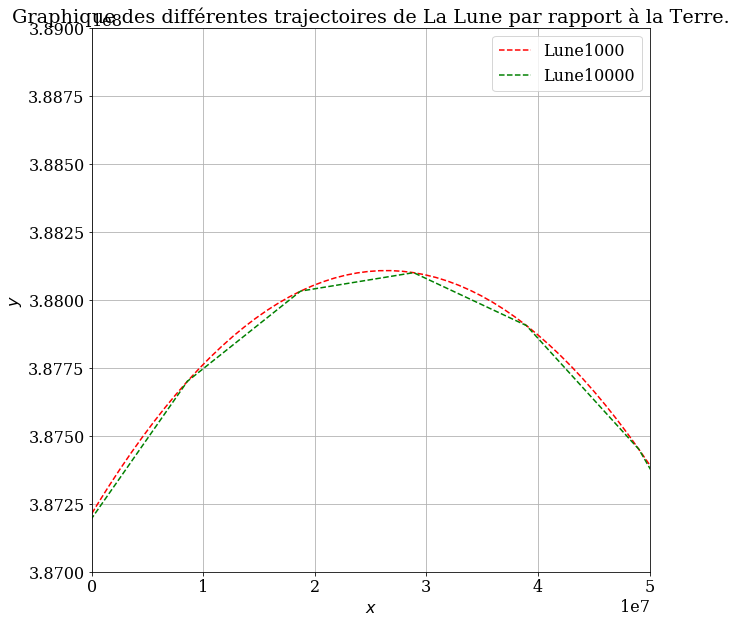

In [19]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_rk4_1000,y_rk4_1000,'r--',label="Lune1000")
pyplot.plot(x_rk4_10000,y_rk4_10000,'g--',label="Lune10000")

pyplot.title('Graphique des différentes trajectoires de La Lune par rapport à la Terre.')
pyplot.legend();
pyplot.xlim(0*10**8,0.5*10**8)
pyplot.ylim(3.87*10**8,3.89*10**8)


On voit clairement apparaitre une différence entre les positions obtenues avec le pas de temps 1000 et 10000. Cette différence est dûe évidemment à la discrétisation du temps. Dans le cas ou dt =10000, la discrétisation du temps est telle que la trajectoire n'est qu'une ellipse à grande échelle.

Revenons en à  notre calcul d'ordre de convergence. En utilisant la même méthode que dans le cours, nous avons le code suivant:

In [20]:
dt_values = numpy.array([10000, 1000, 100])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

#Création de 3 tableaux u_values différents:


for i, dt in enumerate(dt_values):  #boucle des pas dt (3 passages)
    
    N=int(T/dt)+1
    
    u_rk4 = numpy.empty((N, 4))
    u_rk4[0] = numpy.array([v0_x, v0_y, x0, y0])
    
    for n in range(N-1):            #boucle des N-1 itérations pour remplir les 3 tableaux
    
        u_rk4[n+1] = rk4_step(u_rk4[n], f, dt)
        
    u_values[i] = u_rk4

Le code ci-dessus sauvegarde une matrice ,en 3 dimensions, contenant chaque solution à l'équation $u'=f(u)$ pour les différents pas de temps donnés dans dt_values.
Par exemple u_values[0] contiendra u_rk4 calculé avec un pas de temps 10000.

Définissions maintenant get_diffgrid comme vue au cours, qui prendra deux matrices et va faire la comparaison d'éléments pris aux temps t, en prenant compte évidemment de la taille des différentes matrices utilisées comme argument et nous renvoie une liste contenant la différence entre chaque élement des deux matrices de départ.


NB: La fonction "len" prend un tableau et renvoie le nombre d'éléments de ce tableau

In [21]:
def get_diffgrid(u_current, u_fine, dt):

    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dt * numpy.sum(numpy.abs(u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

A présent, nous plaçons les différentes valeurs de diffgrid (donc de $E$), dans un tableau à 3 colonnes, chacune correspondant à un $\Delta t$ différent. "u_values[-1]" correspond à la matrice u_rk4 pour le $\Delta t$ le plus petit, c'est-à-dire $100$,donc la matrice la plus précise.

In [22]:
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):

    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

Si on représente $E$ en fonction de $\Delta t$ sur un graphique, on obtient bien une droite croissante, c'est-à-dire plus le temps dt est petit plus la précision des positions est grande et s'approche de la trajectoire réelle, sans toutefois l'atteindre forcément.

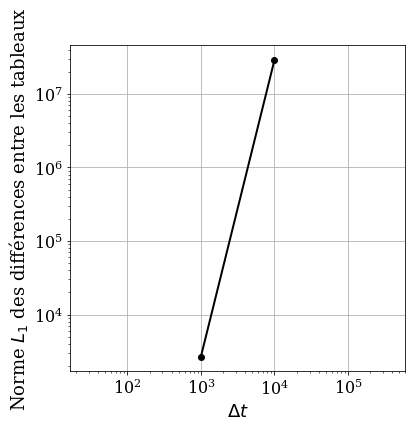

In [23]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('Norme $L_1$ des différences entre les tableaux', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');


A présent, nous allons calculer l'ordre de convegence $p$ défini par:$$p=\frac{log{(\frac{f_{3}-f_{2}}{f_{2}-f_{1}}})}{\log(r)}$$ avec $f_{1}$ la solution affinée et $f_{3}$ la solution avec le dt le plus grand.

Pour cela, nous allons calculer $(f_{2}-f_{1})$ et $(f_{3}-f_{2})$ séparément. Nous avons besoin ,pour ce faire, des tableaux "u_values2[0]", "u_values2[1]" et "u_values2[2]", chacun correspondant à des matrices u calculée aux dt $1000, 10000, 100000$ respectivement.

In [24]:
r = 10
h = 100

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   

    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0_x, v0_y, x0, y0])

    for n in range(N-1):

        u[n+1] = rk4_step(u[n], f, dt)         
    
    u_values2[i] = u
    

#calcul de f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calcul de f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calcul de l'ordre de convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('L ordre de convergence est p = {:.3f}'.format(p));

L ordre de convergence est p = 4.032


On obtient bien un ordre de convergence proche de 4, on dit alors que la méthode RK4 est d'ordre 4.
Notons cependant que cette ordre de convergence n'est pas stable. En effet, si on prend des valeurs de dt de plus en plus petites et qu'on les compare, on va voir que l'ordre de convergence n'est plus 4. Ceci est dû au fait que si on prend des pas de temps petits, on s'approche de plus en plus précisemment de la trajéctoire réelle. Ainsi si on compare des trajectoires qui sont calculées à des pas de temps dt très proche, il sera difficile de bien analyser la différence de convergence entre les deux, puisque les solutions sont déjà très convergentes elles-mêmes.

### Question 5 :
#### Au moment du passage de la lune à l'appogée de sa trajectoire, un astéroïde traverse le centre de l'ellipse avec une vitesse  (vx,vy)=(−500m/s,500m/s). Modifier votre code numérique pour calculer la position de cet astéroïde après 14 jours. On suppose que l'astéroïde est dévié par le systeme Terre-Lune mais que celui-ci est trop léger pour modifier la trajectoire de la terre ou de la lune.

Pour calculer la trajectoire de l'astéroïde, nous allons procéder de la même manière que précédemment à quelques détails près. 
Dans ce problème ci, il faut bien faire attention à prendre en compte les effets de la Terre et de la Lune sur la trajectoire de l'astéroïde. On aura donc deux forces qui vont s'appliquer sur l'astéroïde

Par le même raisonement que dans la question 1 et en se mettant dans le référentiel de la Terre, on obtient:

$$\frac{d^{2}\textbf{r}_{Tast}}{dt^{2}} = -\frac{Gm_{T}\textbf{r}_{TAst}}{r_{Tast}}$$
$$\frac{d^{2}\textbf{r}_{Last}}{dt^{2}} = -\frac{Gm_{L}\textbf{r}_{LAst}}{r_{Last}}$$


Au final, on obtient donc les equations du premier ordre pour les effets de la Terre:
$$(\frac{dv_{x_{ast}}}{dt})_{T} = -\frac{Gm_{T}x_{ast}}{(x_{ast}^2+y_{ast}^2)^{3/2}}$$
$$(\frac{dv_{y_{ast}}}{dt})_{T} = -\frac{Gm_{T}y_{ast}}{(x_{ast}^2+y_{ast}^2)^{3/2}}$$

Et pour les effets de la Lune:
$$(\frac{dv_{x_{ast}}}{dt})_{L} = -\frac{Gm_{T}(x_{ast}-x_{L})}{((x_{ast}-x_{L})^2+(y_{ast}-y_{L})^2)^{3/2}}$$
$$(\frac{dv_{y_{ast}}}{dt})_{L} = -\frac{Gm_{T}(y_{ast}-y_{L})}{((x_{ast}-x_{L})^2+(y_{ast}-y_{L})^2)^{3/2}}$$

Et: 
$$\frac{dx_{ast}}{dt} = v_{x_{ast}} $$
$$\frac{dy_{ast}}{dt} = v_{y_{ast}}$$


Il suffit maintenant d'additionner les deux équations pour n'avoir qu'un et un seul effet qui résulte des deux précédents. Au final on a donc une équation de la forme $u'=g(u)$ avec:

\begin{equation}
u =
\begin{bmatrix}
    v_{x_{ast}}       \\
    v_{y_{ast}}        \\
    x_{ast}       \\
    y_{ast}         \\
\end{bmatrix}
\end{equation}
et
\begin{equation}
g(u) =
\begin{bmatrix}
    (\frac{dv_{x_{ast}}}{dt})_{T} + (\frac{dv_{x_{ast}}}{dt})_{L}    \\
    (\frac{dv_{y_{ast}}}{dt})_{T} + (\frac{dv_{y_{ast}}}{dt})_{L}       \\
    v_{x_{ast}}       \\
    v_{y_{ast}}         \\
\end{bmatrix}
\end{equation}

Nous commençons par fixer les nouvelles conditions initiales et les nouvelles constantes. Comme nous voulons calculer la trajectoire de l'astéroïde sur une période de 14 jours, nous travaillons avec une nouvelle période $T_{2}$ ce qui implique que le nombre d'itérations $N_{2}$ change aussi. 
Pour fixer la position $x$ initiale de l'astéroïde, il suffit de soustraire à $x_{max}$ la longeur du demi grand axe $a$.

In [25]:
T2=14*86400   #Temps total de 14 jours
dt2 = 1.0
N2 = int(T2/dt2) #Nombre d'itérations
apogee = 415353549.349
x0_ast = 415353549.349-388976774.657  #Position initiale en x de l'astéroïde en m 
y0_ast = 0.0                          #Position initiale en y de l'astéroïde en m
v0_x_ast = -500.00                    #Vitesse initiale p/r x de l'astéroïde en m/s
v0_y_ast =500.00                      #Vitesse initiale p/r y de l'astéroïde en m/s


A présent, nous créons deux nouvelles listes "x_lune" et "y_lune" ou nous plaçons les données qui nous intéressent à savoir les position de la lune à partir de sa position x maximale, l'apogée. Nous avions déjà calculé précédemment l'indice ou se trouve $x_{max}$ de la lune : 1207202. 

In [26]:
x_lune = numpy.zeros(N2)                
y_lune = numpy.zeros(N2)
for j in range(N2-1):
    x_lune[j] = new_list[j+1207202][2]  
    y_lune[j] = new_list[j+1207202][3]
    
print(x_lune)
print(y_lune)
    

[  4.15411069e+08   4.15411069e+08   4.15411069e+08 ...,  -3.62593136e+08
  -3.62593129e+08   0.00000000e+00]
[  126213.33399072   125267.63583197   124321.93767252 ...,
  2305620.7109009   2306704.12535487        0.        ]


Nous calculons maintenant la trajectoire de l'astéroïde avec la méthode RK4, comme précédemment. Evidemment, notre fonction ne sera plus $f$ mais une autre fonction que nous appelons $g$ qui prend aussi comme argument une liste  u
contenant notre nouvelle solution à un certain temps n, toujours de taille 4.
Nous devons donc résoudre : $$ u_{n+1} = u_{n} +\frac{dt_{2}}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}) $$ 
Avec, cette fois-ci: 
$$ k_{1} = g(u,n)$$
$$ k_{2} = g(u + \frac{dt_{2} k_{1}}{2},n)$$
$$ k_{3} = g(u + \frac{dt_{2} k_{2}}{2},n)$$
$$ k_{4} = g(u + dt_{2} k_{3},n)$$


Définition de $g$:

Remarque: ici il faut bien faire attention à préciser l'indice pour la position de la lune en $x$ et en $y$, car la Lune est en mouvement elle aussi, à partir de son apogée.

In [27]:
def g(u,n):
    vx_ast = u[0]
    vy_ast = u[1]
    x_ast = u[2]
    y_ast = u[3]
    
    x_T = (-x_ast*Grav_cst*m_terre)/((x_ast)**2+(y_ast)**2)**(3/2)   
    x_L = ((x_ast-x_lune[n])*Grav_cst*m_lune)/((x_ast-x_lune[n])**2+(y_ast-y_lune[n])**2)**(3/2) 
    y_T = (-y_ast*Grav_cst*m_terre)/((x_ast)**2+(y_ast)**2)**(3/2)
    y_L = ((y_ast-y_lune[n])*Grav_cst*m_lune)/(((x_ast-x_lune[n])**2+(y_ast-y_lune[n])**2)**(3/2))
    
    return numpy.array([x_T-x_L,y_T-y_L,vx_ast,vy_ast]) 

Défintion de la méthode numérique Runge-Kutta 4 avec cette fois-ci, $g$, mais qui prend aussi comme argument l'indice $n$:

In [28]:
def rk4_step_ast(u,g,dt,n):
   
    k1 = g(u,n)
    k2 = g(u + (dt*0.5)*k1,n)
    k3 = g(u + (dt*0.5)*k2,n)
    k4 = g(u + dt*k3,n)
    
    
    return u + (dt/6)*(k1+2*k2+2*k3+k4)

A présent, nous calculons toutes les itérations et nous obtenons toutes les positions $(x,y)$ de l'astéroïde par rapport à la Terre:

In [29]:
u_rk4_ast = numpy.zeros((N2,4))
u_rk4_ast[0] = numpy.array([v0_x_ast,v0_y_ast,x0_ast,y0_ast])  #liste contenant les conditions initiales
for n in range(N2-1):
    u_rk4_ast[n+1]= rk4_step_ast(u_rk4_ast[n],g,dt2,n) # itération pour remplir la liste u par la méthode RK4

print(u_rk4_ast)

[[ -5.00000000e+02   5.00000000e+02   2.63767747e+07   0.00000000e+00]
 [ -5.00572864e+02   4.99999995e+02   2.63762744e+07   4.99999998e+02]
 [ -5.01145750e+02   4.99999978e+02   2.63757735e+07   9.99999986e+02]
 ..., 
 [  9.84727103e+02   5.74983618e+02   2.07181132e+07  -8.29369163e+05]
 [  9.83800778e+02   5.75020685e+02   2.07190975e+07  -8.28794161e+05]
 [  9.82874538e+02   5.75057721e+02   2.07200808e+07  -8.28219122e+05]]


In [30]:
x_rk4_ast=u_rk4_ast[:,2]  #liste des positions x de l'astéroïde par rapport à la Terre
y_rk4_ast=u_rk4_ast[:,3]  #liste des positions y de l'astéroïde par rapport à la Terre

Pour nous aider à visualiser la trajectoire, nous construisons une représentation qui reprend la liste des $x_{ast}$ et la liste des $y_{ast}$:

205289.229578


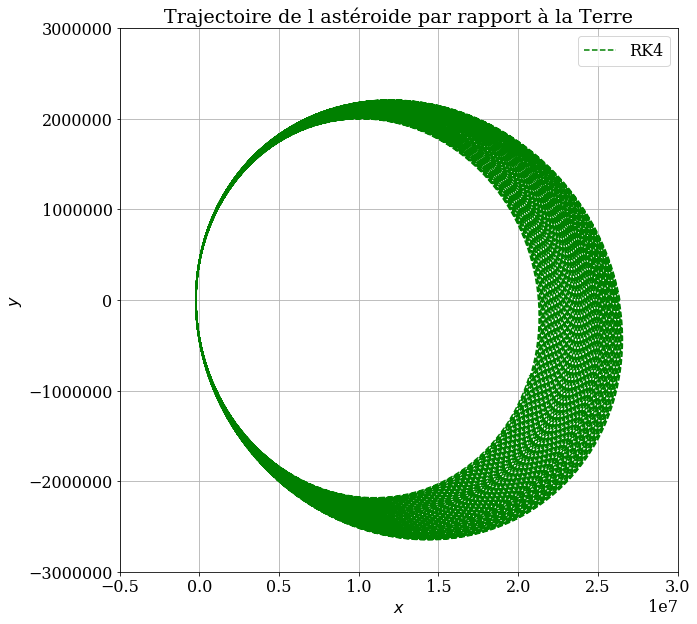

In [31]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_rk4_ast,y_rk4_ast,'g--',label='RK4')
pyplot.title('Trajectoire de l astéroide par rapport à la Terre')
pyplot.legend();
pyplot.xlim(-0.5*10**7, 3.0*10**7)
pyplot.ylim(-0.3*10**7, 0.3*10**7)
r_ast = numpy.empty(N2)
for n in range(N2):
    r_ast[n]=numpy.sqrt(x_rk4_ast[n]**2+y_rk4_ast[n]**2)
print(numpy.amin(r_ast))

Nous avons également calculer la distance astéroïde-Terre, pour voir si l'astéroïde allait s'écraser sur la Terre. Heureusement la distance trouvée est toujours plus grande que le rayon de la Terre (6.371 km), et donc nous sommes sauvés!

(Source : https://imagine.gsfc.nasa.gov/features/cosmic/earth_info.html)

### Question 6:

#### Faites une animation graphique des différentes trajectoires que vous obtenez.

Tout d'abord nous devons importer les animations des libraries python.

NB : Puisque les valeurs de la postion de la Lune sont en $10^8m$ et que les valeurs de l'astéroïde sont en $10^7m$, nous ne pouvons les porter sur un même graphique sans perte de précision, nous avons donc décidé de les porter sur deux graphiques différents.

In [32]:
from matplotlib import animation
from IPython.display import HTML

Ensuite nous créons une figure qui va nous donner la trajectoire de la Lune en fonction du temps. Pour cela nous demandons que la Lune soit caractérisée par un point sur le graphique, qui va tourner autour de la Terre.

Ensuite, pour avoir une animation précise, nous prenons la liste des positions de la Lune obtenue lors de la question 1 et nous créons une copie, que nous allons manipuler. On prend ensuite une valeur toute les 1000 itérations, pour que l'animation ne prenne pas trop de temps à s'afficher.

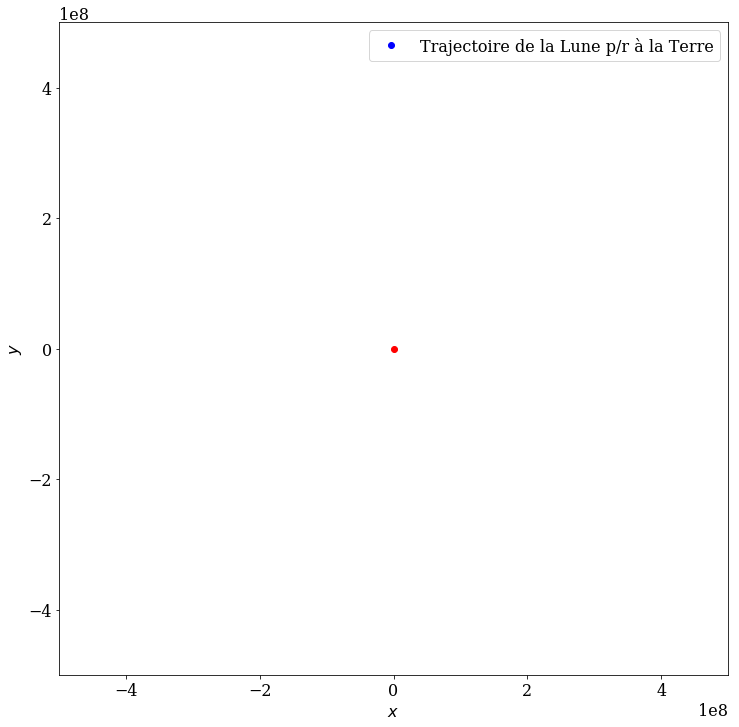

In [33]:
fig = pyplot.figure(figsize=(12,12))
ax = pyplot.axes(xlim=(-5*10**8,5*10**8), ylim=(-5*10**8,5*10**8))
line = ax.plot([], [],'bo')[0]
ax.legend(['Trajectoire de la Lune p/r à la Terre'])
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(0,0,'ro',label="Terre")
x_rk4_lune_grap = x_rk4[:]   #copie de la liste des positions x de la Lune de la question 1
y_rk4_lune_grap = y_rk4[:]   #copie de la liste des positions y de la Lune de la question 1

M1 =int(len(x_rk4_lune_grap)/1000)+1   #création d'un nouvel indice caractérisant le nombre d'éléments que l'on va utilisé pour l'animation.

x_rk4_lune_grap_n = numpy.empty(M1)
y_rk4_lune_grap_n = numpy.empty(M1)
for n in range(M1-1):
    x_rk4_lune_grap_n[n] = x_rk4_lune_grap[n*1000]   #on prend une valeur de x toute les 1000 itérations 
    y_rk4_lune_grap_n[n] = y_rk4_lune_grap[n*1000]   #on prend une valeur de y toute les 1000 itérations 

def lune(i):
    line.set_data( x_rk4_lune_grap_n[i], y_rk4_lune_grap_n[i])
    return line


Il suffit maintenant de faire l'animation!

In [34]:
anim = animation.FuncAnimation(fig, lune,frames = M1, interval=10)
HTML(anim.to_html5_video())

Nous avons bien un trajectoire elliptique de la Lune autour de la Terre.

Nous procédons exactement de la même manière pour l'astéroïde, sauf que l'on prend une valeur toutes les 100 itérations cette fois-ci.

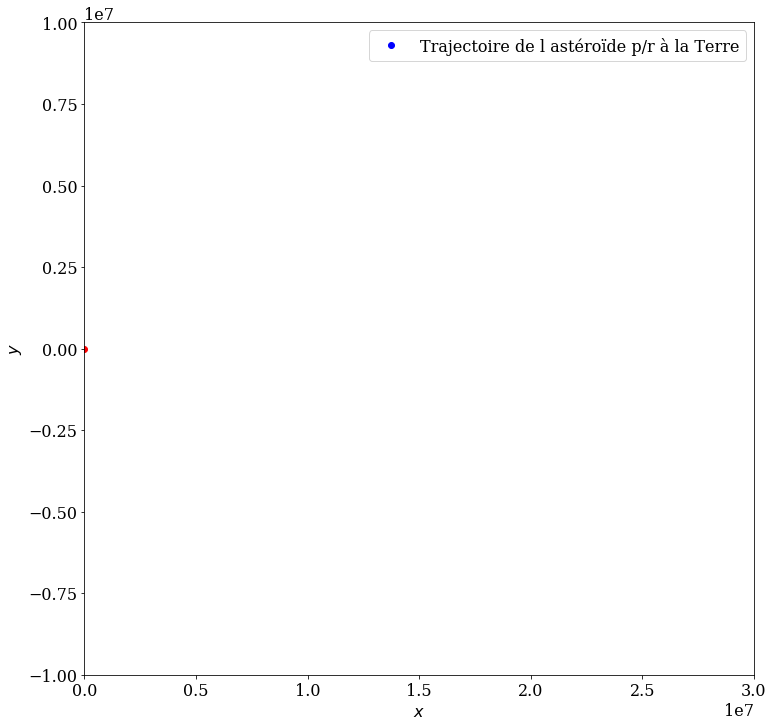

In [ ]:
fig1 = pyplot.figure(figsize=(12,12))
ax = pyplot.axes(xlim=(0,3*10**7), ylim=(-1*10**7,1*10**7))
line2 = ax.plot([], [], 'bo')[0]
ax.legend(['Trajectoire de l astéroïde p/r à la Terre'])
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(0,0,'ro',label="Terre")

x_ast_grap = x_rk4_ast[:]      #copie de la liste des positions x de l'astéroïde de la question 5
y_ast_grap = y_rk4_ast[:]      #copie de la liste des positions y de l'astéroïde de la question 5
M2= int(len(y_ast_grap)/100)+1    #création d'un nouvel indice caractérisant le nombre d'éléments que l'on va utilisé pour l'animation.
x_ast_grap_n = numpy.empty(M2)
y_ast_grap_n = numpy.empty(M2)
for i in range(M2-1):
    x_ast_grap_n[i] =x_ast_grap[i*100]  #on prend i*100 pour avoir moins de temps de compilation, sans trop perdre de données.
    y_ast_grap_n[i] =y_ast_grap[i*100]

def asteroide(i):
    line2.set_data(x_ast_grap_n[i],y_ast_grap_n[i])
    return line2

La prochaine animation prend un certain temps à s'afficher, car nous avons décidé d'avoir une trajéctoire pour contenant de positions pour obtenir une trajectoire qui semble "fluide".

In [ ]:
anim2 = animation.FuncAnimation(fig1, asteroide ,frames = M2, interval=10)
HTML(anim2.to_html5_video())

Malheureusement dans cette animation , nous ne voyons pas la trajectoire de l'astéroïde lorsqu'il passe à 'gauche' de la Terre, car il y passe avec une vitesse très grande. Cependant on voit clairement la trajectoire de l'astéroïde est elliptique. 

Ceci conclut notre travail.


André Odile,
Prista Von Bonhorst Francisco